In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import Perceptron

In [33]:
df=pd.read_csv("Heart Attack Data Set.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [34]:
df['target'].unique()

array([1, 0], dtype=int64)

In [35]:
X=df.drop('target',axis=1)
Y=df['target']

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=0)

In [37]:
perceptron=Perceptron()

In [38]:
perceptron.fit(x_train,y_train)

Perceptron()

In [39]:
y_pred=perceptron.predict(x_test)

In [40]:
print('Classification Report:\n',classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70        27
           1       0.77      0.71      0.74        34

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



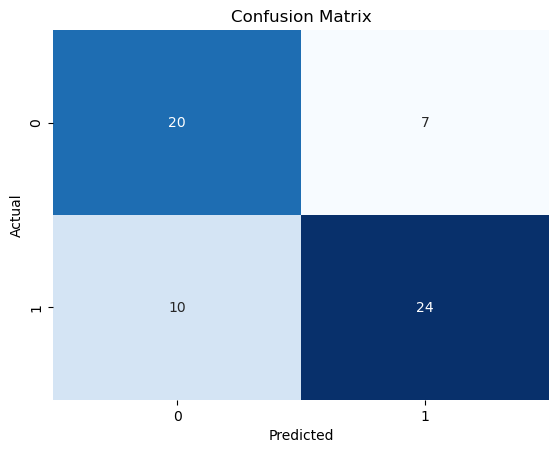

In [41]:
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con,annot=True,cbar=False,cmap=plt.cm.Blues,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

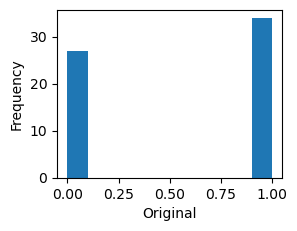

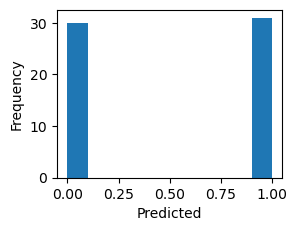

In [42]:
plt.subplot(2,2,2)
plt.hist(y_test)
plt.xlabel('Original')
plt.ylabel('Frequency')
plt.show()
plt.subplot(2,2,2)
plt.hist(y_pred)
plt.xlabel('Predicted')
plt.ylabel('Frequency')
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(X)
from sklearn.model_selection import KFold,cross_val_score
kfold=KFold(n_splits=10,shuffle=True,random_state=0)
acc=cross_val_score(perceptron,x,Y,cv=kfold,scoring='accuracy')
acc=acc.mean()
print(acc)

0.7861290322580645


In [47]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64